## ImageDataGenerator

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

# ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.models import Model

from keras.layers import Dropout, Flatten, Dense, Conv2D
from keras.layers import GlobalAveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

from sklearn.metrics import confusion_matrix

In [2]:
path = "cats_and_dogs/"
training_data_dir = path + "train" 
validation_data_dir = path + "validation" 
test_data_dir = path + "test" 

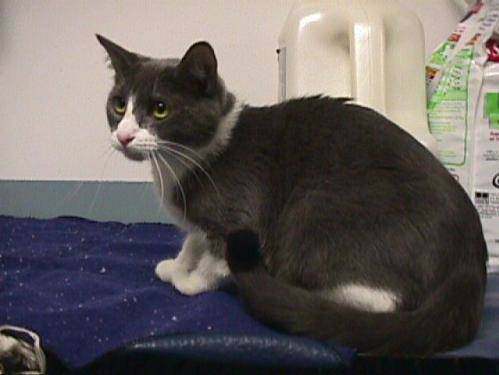

In [3]:
img = Image.open("cats_and_dogs/train/cats/cat.4.jpg")
img

In [4]:
# Preprocesamos la imagen, para poder usar ImageDataGenerator la imagen debe de tener 4 dimensiones

img = np.asarray(img)
print(img.shape)

img = img / 255
print(img.shape)

h_dim = np.shape(img)[0]
w_dim = np.shape(img)[1]
num_channel = np.shape(img)[2]

img = img.reshape(1, h_dim, w_dim, num_channel)
print(img.shape)

(375, 499, 3)
(375, 499, 3)
(1, 375, 499, 3)


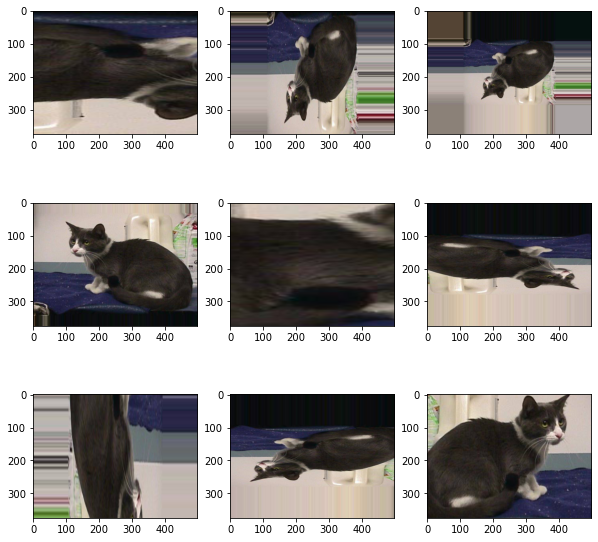

In [5]:
# ImageDataGenerator nos genera imagenes del gato editado 9 veces de diferente forma

batch_size = 9

# Inicializamos ImageDataGenerator
data_gen = ImageDataGenerator(rotation_range = 0,
                             shear_range = 0,
                             zoom_range = 1,
                             horizontal_flip = True,
                             vertical_flip = True,
                             preprocessing_function = None)
# Entrenamos
data_gen.fit(img)

plt.figure(figsize = (10, 10)) 

for x, img_batch in enumerate(data_gen.flow(img, batch_size = 9)):
    for img in img_batch:
        plt.subplot(330 + 1 + x)
        plt.imshow(img)
        x += 1    
    if x >= batch_size:
        break
        
plt.show()

#### Vamos a hacer esto con todas las imagenes del fichero.

In [6]:
# Inicializamos los ImageDataGenerator

training_data_generator = ImageDataGenerator(rescale = 1./255, zoom_range = 1, horizontal_flip = True, vertical_flip = True)

validation_data_generator = ImageDataGenerator(rescale = 1./255, zoom_range = 1, horizontal_flip = True, vertical_flip = True)

test_data_generator = ImageDataGenerator(rescale = 1./255, zoom_range = 1, horizontal_flip = True, vertical_flip = True)

In [7]:
# Entrenamos los ImageDataGenerator

# Para poder usar .flow_from_directory(), necesitamos tener las carpetas ordenadas, es decir:

# una carpeta de train con una carpeta de imagenes para cada clase
# una carpeta de validation con una carpeta de imagenes para cada clase
# y una carpeta de test con una carpeta de imagenes para cada clase

training_generator = training_data_generator.flow_from_directory(training_data_dir,
                                                                 target_size = (200, 200),
                                                                 batch_size = 30,
                                                                 class_mode = "binary")

validation_generator = validation_data_generator.flow_from_directory(validation_data_dir,
                                                                     target_size = (200, 200),
                                                                     batch_size = 1,
                                                                     class_mode = "binary")

test_generator = test_data_generator.flow_from_directory(test_data_dir,
                                                         target_size = (200, 200),
                                                         batch_size = 1,
                                                         class_mode = "binary")

# En caso de que la clisificación sea multi clase, el cambiamos el parámetro class_mode = "categorical"

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = 9, padding = "same", activation = "relu", input_shape = (200, 200, 3)))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(filters = 16, kernel_size = 9, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))

model.add(Flatten())

model.add(Dense(120, activation = "relu"))
model.add(Dropout(0.15))
model.add(Dense(1, activation = "sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      3904      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 16)      20752     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 40000)             0         
                                                                 
 dense (Dense)               (None, 120)               4

In [9]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

history = model.fit(training_generator, epochs = 5, validation_data = validation_generator, verbose = 1)

Epoch 1/5
67/67 [==============================] - 317s 5s/step - loss: 0.7981 - accuracy: 0.5020 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
67/67 [==============================] - 319s 5s/step - loss: 0.6932 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
67/67 [==============================] - 316s 5s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
67/67 [==============================] - 301s 4s/step - loss: 0.6932 - accuracy: 0.4830 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
67/67 [==============================] - 299s 4s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [10]:
def plot_history(history):
    
    accuracy     = history.history["accuracy"]
    loss         = history.history["loss"]

    val_accuracy = history.history["val_accuracy"]
    val_loss     = history.history["val_loss"]

    epochs = range(1, len(accuracy) + 1)

    # Plot Accuracy
    plt.plot(epochs,     accuracy, "r--", label = "Train accuracy")
    plt.plot(epochs, val_accuracy,  "b", label = "Validation accuracy")
    
    plt.title("Training and validation accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    
    plt.show()

    # Plot Loss
    plt.plot(epochs, loss, "r--", label = "Train loss" )
    plt.plot(epochs, val_loss ,  "b", label = "Validation loss" )
    
    plt.title("Training and validation loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.show()

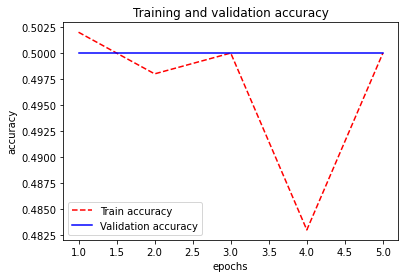

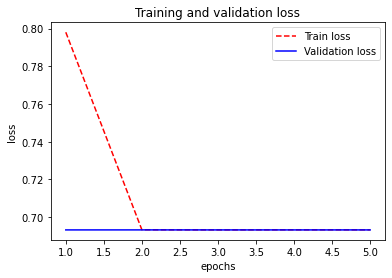

1000/1000 - 52s - loss: 0.6931 - accuracy: 0.5000 - 52s/epoch - 52ms/step
Test Accuracy: 0.5


In [11]:
plot_history(history)

test_loss, test_accuracy = model.evaluate(test_generator, verbose = 2)
print ("Test Accuracy:", test_accuracy)

In [12]:
y_hat = model.predict(test_generator)

y_hat

array([[0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.50128424],
       [0.501

In [13]:
y_test = test_generator.labels

y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
thresh = 0.5

y_hat = [0 if pred < thresh else 1 for pred in y_hat]

y_hat

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [15]:
confusion_matrix(y_test, y_hat)

array([[  0, 500],
       [  0, 500]], dtype=int64)

In [ ]:
model.save_weights("red_neuronal_entrenada_cats_dogs.h5")

In [ ]:
################################################################################################################################